In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# lc4311 is cwacc

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as skl
import matplotlib.pyplot as plt # prereq for sns
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['housing.csv']


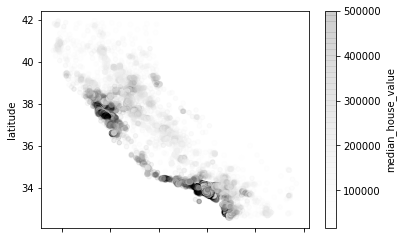

In [43]:
data = pd.read_csv("../input/housing.csv")

# loc: locate by names
# iloc: locate by index. needs #

data.loc[data["total_bedrooms"].isna()] # squish missing vals ØwØ 

# ocean_proximity needs to be numerical 

data.groupby("ocean_proximity").describe()["median_house_value"] # from this we know location matters - island houses are most pricey cuz p r i v a c y 

data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1, c = "median_house_value") # alpha is opt, measures pepel. c shows house pricing in shade, opt. 

# ~data["key"].isna() == isn't na

In [44]:
from sklearn.impute import SimpleImputer # for every missing value replace it. but is dumdum only checks 1 col

data_num = data.drop("ocean_proximity", axis=1)
data_cat = data["ocean_proximity"] # imputing this is dumb ur dumb heckin dum aaaaaAAAAå´ø˚µß√®øßˆƒµ©ªœ∑´ÅÍÎ◊˝Á‡ˇ 

ornageman = SimpleImputer(strategy = "median") # replace with median data (435 in this case)

ornageman.fit(data_num) # training time

ornageman.transform(data_num)

transdata_num = pd.DataFrame(ornageman.transform(data_num),columns=data_num.columns)

print(transdata_num.isna().sum()) # all 0 -> yay is ocmplet

data_cat.unique() # lists cat types

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [45]:
from sklearn.linear_model import LinearRegression # to predict categorical use Naïve Bayes

lr_model = LinearRegression() # hello world

lr_model.fit(transdata_num.drop("median_house_value",axis=1),transdata_num["median_house_value"]) # predicts MHV so drops it 

lr_model.predict(transdata_num.drop("median_house_value",axis=1))

array([408844.60843986, 420911.66915291, 378857.45616476, ...,
        25967.4291983 ,  38404.57465341,  55254.21781936])

In [46]:
data_cat

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY
10       NEAR BAY
11       NEAR BAY
12       NEAR BAY
13       NEAR BAY
14       NEAR BAY
15       NEAR BAY
16       NEAR BAY
17       NEAR BAY
18       NEAR BAY
19       NEAR BAY
20       NEAR BAY
21       NEAR BAY
22       NEAR BAY
23       NEAR BAY
24       NEAR BAY
25       NEAR BAY
26       NEAR BAY
27       NEAR BAY
28       NEAR BAY
29       NEAR BAY
           ...   
20610      INLAND
20611      INLAND
20612      INLAND
20613      INLAND
20614      INLAND
20615      INLAND
20616      INLAND
20617      INLAND
20618      INLAND
20619      INLAND
20620      INLAND
20621      INLAND
20622      INLAND
20623      INLAND
20624      INLAND
20625      INLAND
20626      INLAND
20627      INLAND
20628      INLAND
20629      INLAND
20630      INLAND
20631      INLAND
20632      INLAND
20633      INLAND
20634     

In [47]:
# wanna cry? maybe piss your pants? perhaps shit and ç¨µ?

from sklearn.preprocessing import OneHotEncoder as OHA # no this was never intended to be risqué

encoder = OHA()

encoder.fit(pd.DataFrame(data_cat))
transval = encoder.transform(pd.DataFrame(data_cat)) # returns a sparse matrix, a matrix with mostly 0s – in every row/col there is only 1 true 

data_cate = pd.DataFrame(transval.toarray(),columns=encoder.categories_)

data_cate

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


In [52]:
dataowo = pd.concat([transdata_num,data_cate],axis=1)

dataowo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0.0,0.0,0.0,1.0,0.0


In [63]:
from sklearn.tree import DecisionTreeRegressor as DTR

lm = LinearRegression()

targ = dataowo["median_house_value"]
predictors = dataowo.drop("median_house_value",axis=1)

lm.fit(predictors,targ)

preds = lm.predict(predictors)

np.sqrt(((preds-targ)**2).mean()) # root mean square error (wtf) - abs bad

68709.32557762136

In [66]:
tree = DTR()

tree.fit(predictors,targ)

trepid = tree.predict(predictors)

np.sqrt(((trepid-targ)**2).mean()) # oh mai gäAAAAÃ

# a decision tree partitions data and asks if/else. vary fast.
# e.g. x between(a,b) ? x is ‡ : x is £
# it can only determine stuff inside partitioned regions, cannot predict unknown data outside partitions.

0.0